# Implementation of Gaussian psytrack with one example simulation

In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 140

# Now you can import modules from that folder
import psytrack as psy

In [2]:
# create simulation
test_gauss = True

seed = 31
num_weights = 3
num_trials = 5000
hyper = {'sigma'   : 2**np.array([-4.0,-5.0, -6.0]),
        'sigInit' : 2**np.array([ 0.0, 0.0, 0.0]),
        'sigmay'  : 1.0}

# Simulate
# add gaussian = True to generate gaussian data
simData = psy.generateSim(K=num_weights, N=num_trials, hyper=hyper,
                        boundary=6.0, iterations=1, seed=seed, savePath=None, gaussian=test_gauss)


sigmay = [1.]


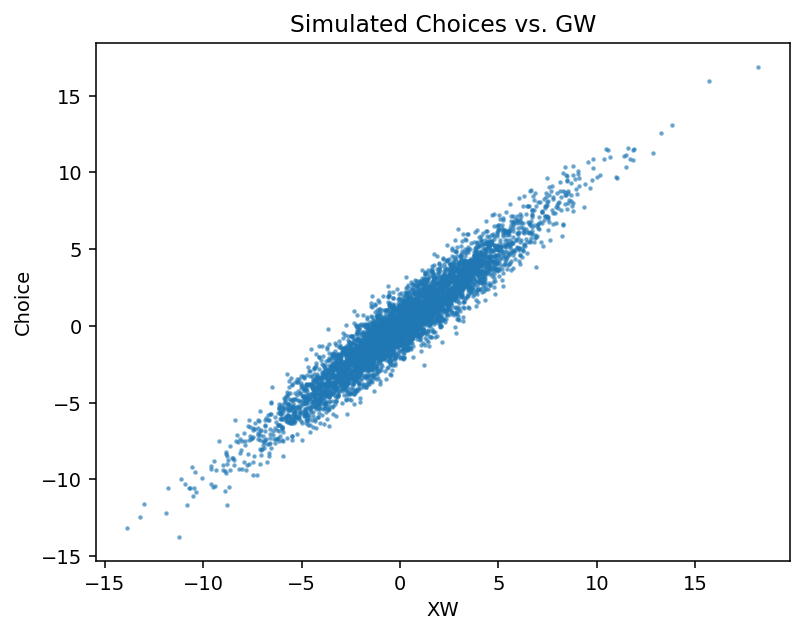

In [ ]:
# check the relationship between w1x1+w2x2+w3x3 and y
W = simData['W']
X = simData['X']
gw = np.sum(W * X,axis = 1)
plt.figure();
plt.scatter(gw, simData['all_Y'][0], alpha=0.5, s=2);
plt.title('Simulated Choices vs. GW');
plt.xlabel('X''W');
plt.ylabel('Choice');
# plt.savefig("example_simulated_choices.png", bbox_inches='tight')

changed version


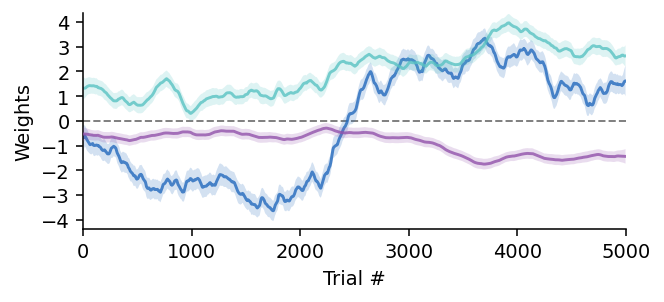

In [ ]:
# run inference (takes about 6 minutes on remote server)
rec = psy.recoverSim(simData, gaussian=test_gauss)

psy.plot_weights(rec['wMode'], errorbar=rec["hess_info"]["W_std"]);
# plt.savefig("example_recovered_weights.png", bbox_inches='tight')